In [7]:
import numpy as np
import pandas as pd

df_dados_paises = pd.read_csv('dados_1997_2011_paises_csv.csv', sep = ';', encoding = 'latin1', decimal = ',')

In [8]:

# Grouping and calculating descriptive statistics
result_df = df_dados_paises.groupby('pais').agg(
    min_idh=pd.NamedAgg(column='idh', aggfunc='min'),
    max_idh=pd.NamedAgg(column='idh', aggfunc='max'),
    media_idh=pd.NamedAgg(column='idh', aggfunc='mean'),
    mediana_idh=pd.NamedAgg(column='idh', aggfunc='median'),
    desvio_padrao_idh=pd.NamedAgg(column='idh', aggfunc='std')
)

# Display the result DataFrame
print(result_df)


                min_idh  max_idh  media_idh  mediana_idh  desvio_padrao_idh
pais                                                                       
Alemanha         0.8466   0.9050   0.882880       0.8888           0.020187
Austrália        0.8958   0.9290   0.914507       0.9156           0.010485
Brasil           0.6464   0.7180   0.684653       0.6866           0.022727
Bélgica          0.8628   0.8860   0.876107       0.8754           0.006401
Canadá           0.8736   0.9080   0.890480       0.8894           0.011899
China            0.5598   0.6870   0.625240       0.6240           0.041928
Cingapura        0.7404   0.8660   0.821587       0.8282           0.037984
Coréia           0.8078   0.8970   0.856907       0.8588           0.029773
Espanha          0.8162   0.8780   0.852427       0.8534           0.019299
Estados Unidos   0.8886   0.9130   0.900947       0.9010           0.006558
França           0.8298   0.8840   0.861773       0.8644           0.018103
Holanda     

In [9]:
# amostragem
df_amostra = df_dados_paises.sample(n=50)
df_amostra.shape

#O RESTULADO DEVE MOSTRAR QUE O DF TEM 50 LINHAS E 8 COLUNAS

(50, 8)

In [10]:
# importar modulo
from scipy import stats as st
# separar dados
dados_brasil = df_dados_paises[df_dados_paises['pais'] == 'Brasil']
# testar hipótese
st.ttest_1samp(a=dados_brasil['idh'], popmean=0.5)


TtestResult(statistic=31.467547309127106, pvalue=2.1573861411421064e-14, df=14)

In [11]:
# correlacao
cols = ['idh', 'corrupcao_indice', 'competitividade_indice', 'globalizacao_indice']
df_dados_paises[cols].corr()

,idh,corrupcao_indice,competitividade_indice,globalizacao_indice
idh,1.000000,0.742528,0.576736,0.807371
corrupcao_indice,0.742528,1.000000,0.753907,0.807345
competitividade_indice,0.576736,0.753907,1.000000,0.580710
globalizacao_indice,0.807371,0.807345,0.580710,1.000000


In [12]:
# carregar módulos
import statsmodels.formula.api as sm
# treinar algoritmo
modelo_regressao = sm.ols(formula='idh ~ corrupcao_indice + competitividade_indice + globalizacao_indice', data=df_dados_paises).fit()
# ver resultados
modelo_regressao.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    idh   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     197.3
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           7.53e-69
Time:                        03:04:29   Log-Likelihood:                 365.76
No. Observations:                 285   AIC:                            -723.5
Df Residuals:                     281   BIC:                            -708.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.3039      0.029     10.493      0.000       0.247       0.361
corrupcao_indice           0.0010      0.000      2.756      0.006       0.000       0.002
competitividade_indice     0.0006      0.000      1.516      0.131      -0.000       0.001
globalizacao_indice        0.0053      0.001     10.492      0.000       0.004       0.006
==============================================================================
Omnibus:                        0.422   Durbin-Watson:                   0.151
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.414
Skew:                           0.092   Prob(JB):                        0.813
Kurtosis:                       2.963   Cond. No.                         870.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# carregar modulo
from sklearn.cluster import KMeans

# estatísticas descritivas
dados_resumo = df_dados_paises.groupby('pais').agg(
    media_corrupcao=pd.NamedAgg('corrupcao_indice', 'mean'),
    media_competitividade=pd.NamedAgg('competitividade_indice', 'mean'),
    media_globalizacao=pd.NamedAgg('globalizacao_indice', 'mean')
).reset_index()

# instanciar algoritmo
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

# aplicar o algoritmo nos dados
kmeans.fit(dados_resumo[['media_corrupcao', 'media_competitividade', 'media_globalizacao']])

# associar os clusters aos paises
dados_resumo['cluster'] = kmeans.labels_

# verificar resultados
dados_resumo.head()


,pais,media_corrupcao,media_competitividade,media_globalizacao,cluster
0,Alemanha,79.066667,74.262667,84.034138,2
1,Austrália,86.800000,80.448667,81.790126,2
2,Brasil,36.533333,49.568000,59.332414,1
3,Bélgica,67.200000,69.065333,92.173351,0
4,Canadá,88.466667,81.897333,87.087049,2


import numpy as np
from google.colab import autoviz
df_4992270828438583308 = autoviz.get_df('df_4992270828438583308')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4992270828438583308, *['media_corrupcao'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5506392532013410897 = autoviz.get_df('df_5506392532013410897')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5506392532013410897, *['media_competitividade'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2061335569159217355 = autoviz.get_df('df_2061335569159217355')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2061335569159217355, *['media_globalizacao'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2602090201182838046 = autoviz.get_df('df_2602090201182838046')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2602090201182838046, *['cluster'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6160654405156099234 = autoviz.get_df('df_6160654405156099234')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6160654405156099234, *['media_corrupcao'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2878648625785080390 = autoviz.get_df('df_2878648625785080390')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2878648625785080390, *['media_competitividade'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2856386967135955571 = autoviz.get_df('df_2856386967135955571')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2856386967135955571, *['media_globalizacao'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6735026072195410440 = autoviz.get_df('df_6735026072195410440')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6735026072195410440, *['cluster'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8101768193806313290 = autoviz.get_df('df_8101768193806313290')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_8101768193806313290, *['pais'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8577465816671420789 = autoviz.get_df('df_8577465816671420789')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_8577465816671420789, *[[['media_corrupcao', 'media_competitividade'], ['media_competitividade', 'media_globalizacao'], ['media_globalizacao', 'cluster']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_7941695708750613390 = autoviz.get_df('df_7941695708750613390')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7941695708750613390, *['media_corrupcao', 'pais'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_2120444373403700656 = autoviz.get_df('df_2120444373403700656')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_2120444373403700656, *['media_competitividade', 'pais'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_7938901466869124192 = autoviz.get_df('df_7938901466869124192')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7938901466869124192, *['media_globalizacao', 'pais'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_5565238655788650551 = autoviz.get_df('df_5565238655788650551')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_5565238655788650551, *['cluster', 'pais'], **{'inner': 'stick'})
chart

<Axes: >

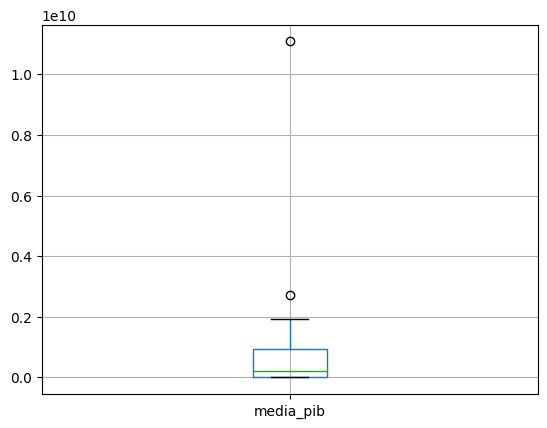

In [14]:
# estatísticas descritivas
dados_resumo = df_dados_paises.groupby('pais').agg(
    media_pib=pd.NamedAgg('pib', 'median')
).reset_index()

# boxplot
dados_resumo[['media_pib']].boxplot()


In [16]:
# Grouping and calculating descriptive statistics for Brazil
brazil_data = df_dados_paises[df_dados_paises['pais'] == 'Brasil']
mean_idh_brazil = brazil_data['idh'].mean()
median_idh_brazil = brazil_data['idh'].median()
min_idh_brazil = brazil_data['idh'].min()
max_idh_brazil = brazil_data['idh'].max()

# Grouping and calculating descriptive statistics for Germany (Alemanha)
germany_data = df_dados_paises[df_dados_paises['pais'] == 'Alemanha']
mean_idh_germany = germany_data['idh'].mean()
median_idh_germany = germany_data['idh'].median()
min_idh_germany = germany_data['idh'].min()
max_idh_germany = germany_data['idh'].max()

# Print the results for Brazil
print("Descriptive statistics for Brazil:")
print("Mean IDH for Brazil:", mean_idh_brazil)
print("Median IDH for Brazil:", median_idh_brazil)
print("Minimum IDH for Brazil:", min_idh_brazil)
print("Maximum IDH for Brazil:", max_idh_brazil)
print()

# Print the results for Germany (Alemanha)
print("Descriptive statistics for Germany (Alemanha):")
print("Mean IDH for Germany (Alemanha):", mean_idh_germany)
print("Median IDH for Germany (Alemanha):", median_idh_germany)
print("Minimum IDH for Germany (Alemanha):", min_idh_germany)
print("Maximum IDH for Germany (Alemanha):", max_idh_germany)


Descriptive statistics for Brazil:
Mean IDH for Brazil: 0.6846533333333333
Median IDH for Brazil: 0.6866
Minimum IDH for Brazil: 0.6464
Maximum IDH for Brazil: 0.718

Descriptive statistics for Germany (Alemanha):
Mean IDH for Germany (Alemanha): 0.8828799999999999
Median IDH for Germany (Alemanha): 0.8888
Minimum IDH for Germany (Alemanha): 0.8466
Maximum IDH for Germany (Alemanha): 0.905
